In [2]:
import mglearn

## KNN Intro

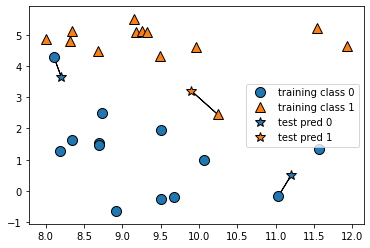

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

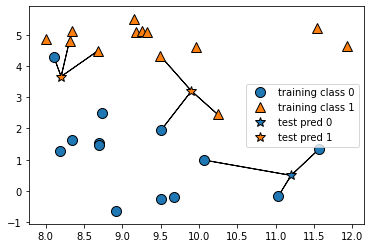

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## KNN using sckit-learn

In [5]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# split the datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [6]:
# define classfier model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

In [7]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
print('Test set predictions {}', classifier.predict(X_test))

Test set predictions {} [1 0 1 0 1 0 0]


In [9]:
print('Test set Accuracy {}', classifier.score(X_test, y_test))

Test set Accuracy {} 0.8571428571428571


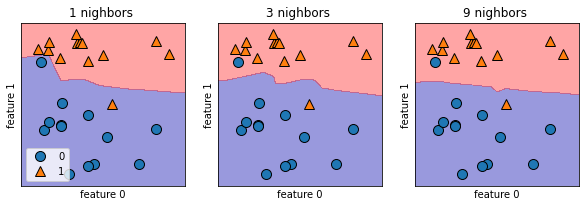

In [10]:
import matplotlib.pyplot as plt

# decision boundaries visualization
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    
    mglearn.plots.plot_2d_separator(classifier, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{} nighbors ".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

## using breast_cancer dataset

In [11]:
from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer()

print(bc_data.feature_names)
print(bc_data.target_names)
print(bc_data.DESCR)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
 

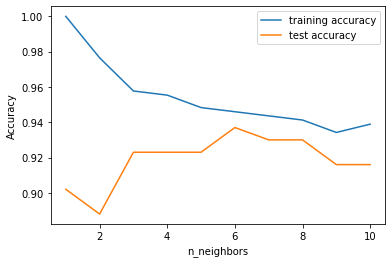

In [12]:
X_train, X_test, y_train, y_test = train_test_split(bc_data.data, bc_data.target, stratify=bc_data.target, random_state=66)
neighbors_settings = range(1,11)

train_scores = []
test_scores = []

for n_neighbors in neighbors_settings:
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_train, y_train)
    train_scores.append(classifier.score(X_train, y_train))
    test_scores.append(classifier.score(X_test, y_test))
    
plt.plot(neighbors_settings, train_scores, label="training accuracy")
plt.plot(neighbors_settings, test_scores, label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


## KNN regression

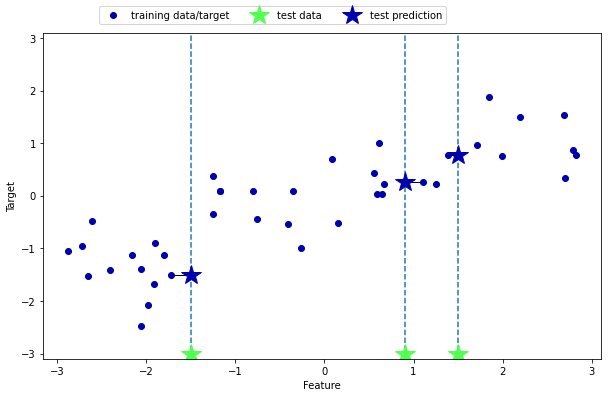

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate regressor
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train, y_train)

# check scoring
print("accuration %f" % regressor.score(X_test, y_test))

accuration 0.834417


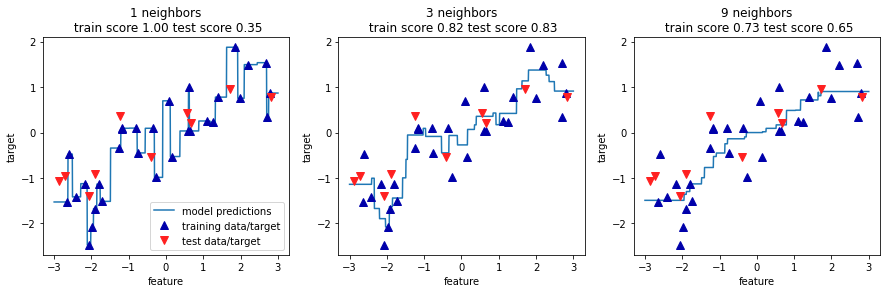

In [15]:
import numpy as np

# analize KNeighborRegressor
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    # make predictions
    regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    regressor.fit(X_train, y_train)
    
    ax.plot(line, regressor.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbors\n train score {:.2f} test score {:.2f}".format(
    n_neighbors, regressor.score(X_train, y_train), regressor.score(X_test, y_test)))
    
    ax.set_xlabel("feature")
    ax.set_ylabel("target")

axes[0].legend(["model predictions", "training data/target", "test data/target"], loc="best")